**Problem Statement**: Understand how the bank approves and refuses loan. Find out different patterns and represent the outcomes to help the bank reduce the credit risk and interest risk.

The two input files are extracted, cleaned/transformed and few columns are analyzed using different charts generated using different Python libraries. Then some inferences are made based on the outcomes.

# **1. importing required libraries and reading the data**


In [2]:
# Code to mount google drive   (loading the data from your google drive)
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold      # for Feature selection
from sklearn.feature_selection import mutual_info_classif    # Feature selection - mutual information

In [4]:
# Loading data from csv file
data_path_ad = '/gdrive/MyDrive/PGD_project/application_data.csv'
app_data = pd.read_csv(data_path_ad)

data_path_pd = '/gdrive/MyDrive/PGD_project/previous_application.csv'
pre_data = pd.read_csv(data_path_pd)

In [5]:
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# **2. Application Data Check**


In [6]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
app_data.shape

(307511, 122)

In [8]:
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [9]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# **3. Previous Application data check**

In [10]:
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pre_data.shape

(1670214, 37)

In [12]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
pre_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# **4. Data Cleaning & Manipulation on Application data**

**4.1 Checking the Application dataset**

In [14]:
# Finding the percentage of missing values in all columns
round(app_data.isnull().mean()*100,5).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87230
COMMONAREA_AVG                  69.87230
COMMONAREA_MODE                 69.87230
NONLIVINGAPARTMENTS_MODE        69.43296
NONLIVINGAPARTMENTS_MEDI        69.43296
NONLIVINGAPARTMENTS_AVG         69.43296
FONDKAPREMONT_MODE              68.38617
LIVINGAPARTMENTS_MEDI           68.35495
LIVINGAPARTMENTS_MODE           68.35495
LIVINGAPARTMENTS_AVG            68.35495
FLOORSMIN_MEDI                  67.84863
FLOORSMIN_MODE                  67.84863
FLOORSMIN_AVG                   67.84863
YEARS_BUILD_MEDI                66.49778
YEARS_BUILD_AVG                 66.49778
YEARS_BUILD_MODE                66.49778
OWN_CAR_AGE                     65.99081
LANDAREA_MODE                   59.37674
LANDAREA_AVG                    59.37674
LANDAREA_MEDI                   59.37674
BASEMENTAREA_MEDI               58.51596
BASEMENTAREA_AVG                58.51596
BASEMENTAREA_MODE               58.51596
EXT_SOURCE_1                    56.38107
NONLIVINGAREA_ME

Insight:
- There are 122 columns in Application data file.
- In Application data we have 50 columns which have more than 30% of null values and one more column which is "Occutation type" could be one of the important feature but it has 19% of missing values which might lead us to wrong conclusion.So removing the columns which have more than 19% of missing values

In [15]:
# Removing all the columns with more than 19% nulls values/Keeping all of them with <= 19% null values
# Occutation type could be one of the important feature but it has 19% of missing values which might lead us to wrong conclusion.
# So removing the columns which have more than 19% of missing values
app_data = app_data.loc[:,app_data.isnull().mean()<=0.19]
app_data.shape

(307511, 71)

In [16]:
#Selecting columns with less or equal to than 13% and greater than 0 null vallues
list(app_data.columns[(app_data.isnull().mean()<=0.13) & (app_data.isnull().mean()>0)])

#We will check those columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

**4.2 Checking for values to impute in columns**

**4.2.1. EXT_SOURCE_2 imputation**

In [17]:
app_data['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


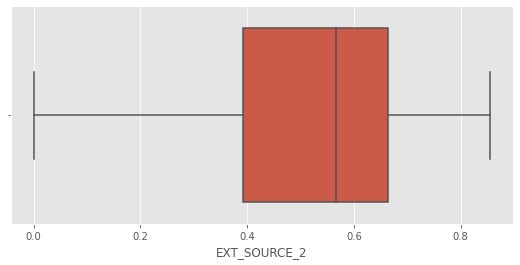

In [18]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[9,4])
sns.boxplot(app_data['EXT_SOURCE_2'])
plt.show()

In [19]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
impute_value = round(app_data['EXT_SOURCE_2'].mean(),2)
print(f'Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the column i.e. {impute_value}')

Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the column i.e. 0.51


**4.2.2. AMT_ANNUITY imputation**

In [20]:
app_data['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


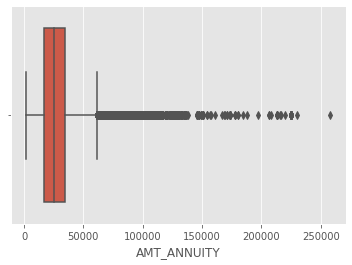

In [21]:
# Since AMT_ANNUITY is a continuous variable. So checking for outliers
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

In [22]:
impute_value = round(app_data['AMT_ANNUITY'].median(),2)
print(f'Since AMT_ANNUITY has outliers, the column can be imputed using the median of the column i.e. {impute_value}')

Since AMT_ANNUITY has outliers, the column can be imputed using the median of the column i.e. 24903.0


**4.2.3. NAME_TYPE_SUITE imputation**

In [23]:
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [24]:
impute_value = app_data['NAME_TYPE_SUITE'].mode()
print(f'Clearly the column NAME_TYPE_SUITE is a categorical column.\nSo this column can be imputed using the mode of the column - "{impute_value[0]}"') 

Clearly the column NAME_TYPE_SUITE is a categorical column.
So this column can be imputed using the mode of the column - "Unaccompanied"


**4.2.4. CNT_FAM_MEMBERS imputation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


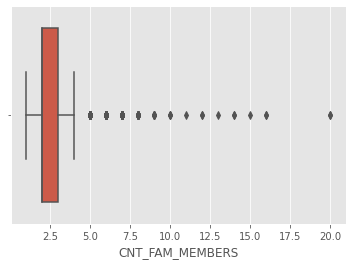

In [25]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()

In [26]:
impute_value = round(app_data['CNT_FAM_MEMBERS'].median(),2)
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column i.e. {impute_value}')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column i.e. 2.0


**4.2.5. AMT_GOODS_PRICE imputation**

In [27]:
app_data['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


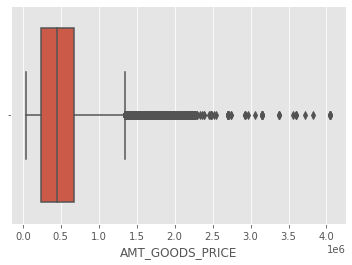

In [28]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

In [29]:
# Since this is a continuous variable with outliers we can impute column using median value
impute_value = round(app_data['AMT_GOODS_PRICE'].median(),2)
print(f'Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the column i.e. {impute_value}')

Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the column i.e. 450000.0


**4.3 Check datatypes of columns and modify them appropriately**

In [30]:
#Checking the float type columns
app_data.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [31]:
#Converting these count columns to int64 because the following columns have only integer values
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
app_data.loc[:,ColumnToConvert]=app_data.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [32]:
#Checking the object type columns
app_data.select_dtypes(include='object').columns


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

In [33]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#Checking Gender values
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
app_data = app_data[app_data['CODE_GENDER']!='XNA']

#Making Gender more readable 
app_data['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


**4.4 Binning variables for analysis**

In [36]:
app_data['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
#Creating A new categorical variable based on income total
app_data['INCOME_GROUP']=pd.qcut(app_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
#Binning DAYS_BIRTH
abs(app_data['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [39]:
#Creating a column AGE using DAYS_BIRTH
app_data['AGE']=abs(app_data['DAYS_BIRTH'])//365.25

In [40]:
app_data['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [41]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
app_data['AGE_GROUP'] = pd.cut(app_data['AGE'],bins=np.arange(20,71,5))

In [42]:
## Adding one more column that will be used for analysis later
app_data['CREDIT_INCOME_RATIO']=round((app_data['AMT_CREDIT']/app_data['AMT_INCOME_TOTAL']))

**4.5 - Checking for imbalance in Target**

In [43]:
app_data['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

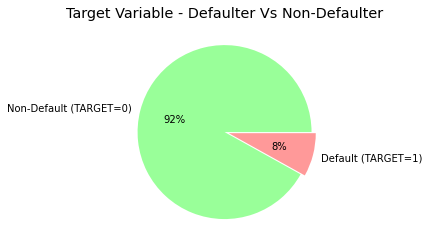

In [44]:
colors = ['#99ff99', '#ff9999']
# fig1, ax1 = plt.subplots()
plt.pie(app_data['TARGET'].value_counts(normalize=True)*100,labels=['Non-Default (TARGET=0)','Default (TARGET=1)'], explode=(0,0.05), colors=colors, autopct='%1.f%%')
plt.title('Target Variable - Defaulter Vs Non-Defaulter')
plt.show()

**Observation**:
- Its clear that there is an imbalance between people who defaulted and who didn't default. Around 92% of people didn't default as opposed to 8% who defaulted.

# **5. Feature selection, Univariate and Bivariate analysis on application data**

**5.1. Feature selection - VarianceThreshold**
- In this step we identify the features which are constant. It will be used to filter the columns for further analysis

In [45]:
#Retriving integer and float columns
cols_int = list(app_data.select_dtypes('int64').columns)
cols_float = list(app_data.select_dtypes('float').columns)

#Combining integer and float columns
cols = cols_int + cols_float

#Getting the data of integer and float columns
x_num = app_data[cols]

#Separating the feature 'TARGET'
x = x_num.drop(labels= ['TARGET'], axis=1)
y = x_num['TARGET']

In [46]:
# Applying Variance threshold 0.03
var_thres = VarianceThreshold(threshold=0.03)
var_thres.fit(x)

VarianceThreshold(threshold=0.03)

In [47]:
#Checking the no. of columns which are NOT in threshold 
print(f'Number of columns which are not in threshold 0.03 = {sum(var_thres.get_support())}')
var_thres.get_support()

Number of columns which are not in threshold 0.03 = 38


array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True])

In [48]:
# Finding the columns which are almost constant which will be used to filter out te columns for further analysis
constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(f'Number of columns which are in threshold 0.03 = {len(constant_columns)}')

for column in constant_columns:
  print(column)

Number of columns which are in threshold 0.03 = 23
FLAG_MOBIL
FLAG_CONT_MOBILE
REG_REGION_NOT_LIVE_REGION
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_7
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
REGION_POPULATION_RELATIVE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY


**5.2. Feature selection - Mutual information**
- In this step we identify most important numerical features.

In [49]:
#Checking is there any feature have the value 'NaN'
np.any(np.isnan(x))

True

In [50]:
x.columns[x.isna().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [51]:
# Replacing the value NaN (null) with zero in order to use Mutal Information for Feature selection
x['AMT_ANNUITY'] = x['AMT_ANNUITY'].replace(np.nan, 0)
x['EXT_SOURCE_2'] = x['EXT_SOURCE_2'].replace(np.nan, 0)
x['DAYS_LAST_PHONE_CHANGE'] = x['DAYS_LAST_PHONE_CHANGE'].replace(np.nan, 0)
x['AMT_GOODS_PRICE'] = x['AMT_GOODS_PRICE'].replace(np.nan, 0)
x['CNT_FAM_MEMBERS'] = x['CNT_FAM_MEMBERS'].replace(np.nan, 0)
x['OBS_30_CNT_SOCIAL_CIRCLE'] = x['OBS_30_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
x['OBS_60_CNT_SOCIAL_CIRCLE'] = x['OBS_60_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
x['DEF_30_CNT_SOCIAL_CIRCLE'] = x['DEF_30_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
x['DEF_60_CNT_SOCIAL_CIRCLE'] = x['DEF_60_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0)
x['AMT_REQ_CREDIT_BUREAU_HOUR'] = x['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan, 0)
x['AMT_REQ_CREDIT_BUREAU_DAY'] = x['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan, 0)
x['AMT_REQ_CREDIT_BUREAU_WEEK'] = x['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan, 0)
x['AMT_REQ_CREDIT_BUREAU_MON'] = x['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan, 0)
x['AMT_REQ_CREDIT_BUREAU_QRT'] = x['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan, 0)
x['AMT_REQ_CREDIT_BUREAU_YEAR'] = x['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan, 0)

In [52]:
# determine the mutual information
mutual_info = mutual_info_classif(x, y)
mutual_info

array([0.00000000e+00, 3.10010898e-03, 3.69468055e-03, 1.60399010e-02,
       1.45477097e-03, 6.66424980e-02, 4.47798280e-02, 2.42508685e-03,
       6.52014588e-02, 4.93123815e-03, 0.00000000e+00, 3.89955846e-02,
       3.98888290e-02, 5.12191597e-03, 4.73865242e-04, 1.14030224e-04,
       8.54711140e-04, 1.21081148e-03, 4.37358549e-03, 2.51339416e-03,
       0.00000000e+00, 3.25596035e-02, 4.63406393e-04, 0.00000000e+00,
       1.20275937e-03, 0.00000000e+00, 1.49570498e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.61820071e-04,
       0.00000000e+00, 7.09511869e-04, 5.82349582e-05, 2.07871352e-04,
       4.11081731e-04, 2.84879912e-04, 2.44609317e-04, 1.72986155e-04,
       4.80433502e-03, 4.46318436e-03, 7.73693146e-03, 1.18225688e-02,
       6.43906520e-03, 2.71502147e-03, 1.65594826e-03, 1.99911970e-02,
       1.21351856e-02, 3.07161751e-03, 1.02583638e-03, 2.96843243e-03,
       1.16663222e-03, 1.86675888e-03, 0.00000000e+00, 6.08425012e-04,
      

In [53]:
#getting important features 
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

FLAG_MOBIL                     0.066642
FLAG_CONT_MOBILE               0.065201
FLAG_EMP_PHONE                 0.044780
REGION_RATING_CLIENT_W_CITY    0.039889
REGION_RATING_CLIENT           0.038996
FLAG_DOCUMENT_3                0.032560
CNT_FAM_MEMBERS                0.019991
DAYS_EMPLOYED                  0.016040
EXT_SOURCE_2                   0.012135
AMT_ANNUITY                    0.011823
AMT_CREDIT                     0.007737
CREDIT_INCOME_RATIO            0.006732
AMT_GOODS_PRICE                0.006439
AMT_REQ_CREDIT_BUREAU_YEAR     0.006062
HOUR_APPR_PROCESS_START        0.005122
FLAG_PHONE                     0.004931
AGE                            0.004804
AMT_INCOME_TOTAL               0.004463
REG_CITY_NOT_WORK_CITY         0.004374
DAYS_BIRTH                     0.003695
CNT_CHILDREN                   0.003100
OBS_30_CNT_SOCIAL_CIRCLE       0.003072
OBS_60_CNT_SOCIAL_CIRCLE       0.002968
REGION_POPULATION_RELATIVE     0.002715
LIVE_CITY_NOT_WORK_CITY        0.002513


In [54]:
# From the remaining columns about 30 are selected based on their description, relevance with problem statement and feature selection analysis 
#for further analysis
# "['SOCIAL_CIRCLE_60_DAYS_DEF_PERC', 'OCCUPATION_TYPE', 'SOCIAL_CIRCLE_30_DAYS_DEF_PERC'] not in index"
final_columns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE']

In [55]:
app_data_final = app_data[final_columns]

In [56]:
app_data_final.shape

(307507, 31)

**5.3 Splitting the dataframe into two separate data frame based on the TARGET feature**

In [57]:
# Dataframe with all the data related to non-defaulters
app_0=app_data_final[app_data_final.TARGET==0] 

# Dataframe with all the data related to defaulters
app_1=app_data_final[app_data_final.TARGET==1]    


**5.4 Univariate Analysis**

Function to plot the univariate categorical variables

In [58]:
# function to count plot for categorical variables
def plotunivariateapp(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
    
    sns.countplot(x=var, data=app_0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app_0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=app_1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

5.4.1 Univariate Categorical Ordered Analysis

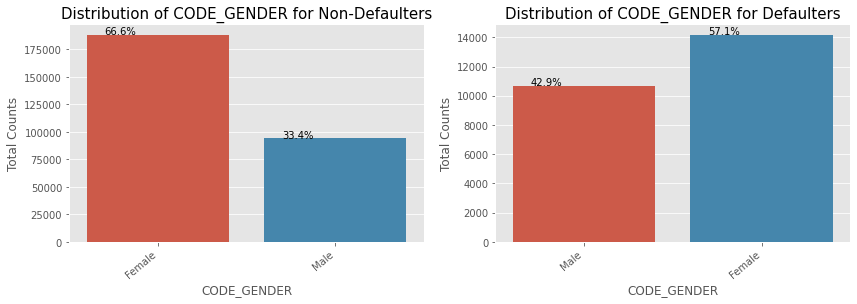

In [59]:
plotunivariateapp('CODE_GENDER')

**Observation**:
- We can observe that Female contribute 67% to the non-defaulters while 57% to the defaulters. 
- So, we can conclude that **more female applying for loans than males** and hence the more number of female defaulters as well.
- **But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts**.



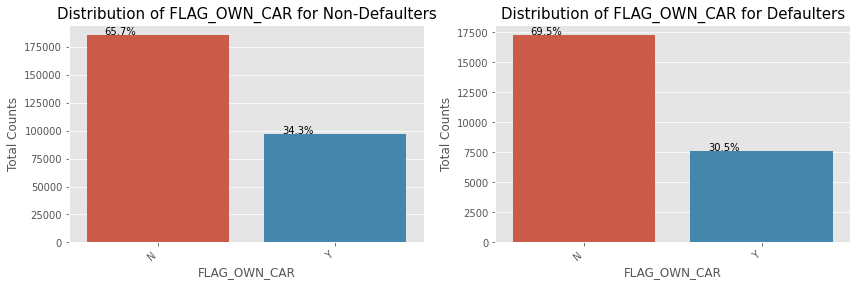

In [60]:
plotunivariateapp('FLAG_OWN_CAR')

**Observation**:
- We can observe that people who do not own car contribute 65.7% to the non-defaulters while 69.5% to the defaulters. 
- We can conclude that people who do not have car default more often, the reason could be there may be more people without cars.
- We can infer from the charts, **that the rate of default of people having car is low compared to people who do not have car'**.

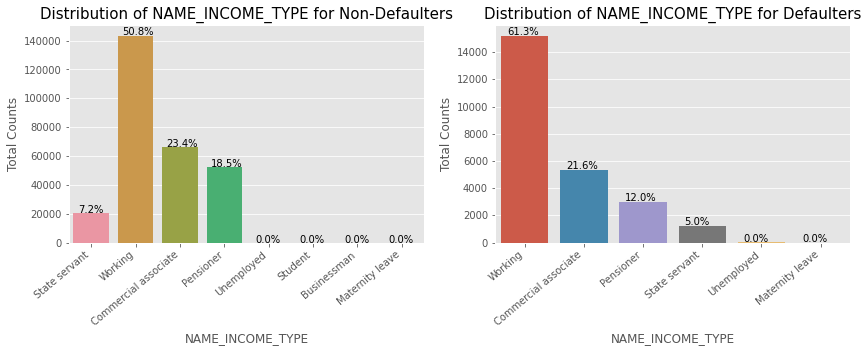

In [61]:
plotunivariateapp('NAME_INCOME_TYPE')

**Observation**:
- We can infer most of the loans are distributed to working class people
- We also observe that working class people contribute 51% to non defaulters while they contribute to 61% of the defaulters. Clearly, the chances of defaulting are more in their case.
- We can notice that the students don't default. The reason could be they are not required to pay during the time they are students 
- We can also observe that the BusinessMen never default. The reason could be the BusinessMen may raise the fund by selling the bond or shares of their company (or) the cash loans/Revolving loans are less attractive to them.

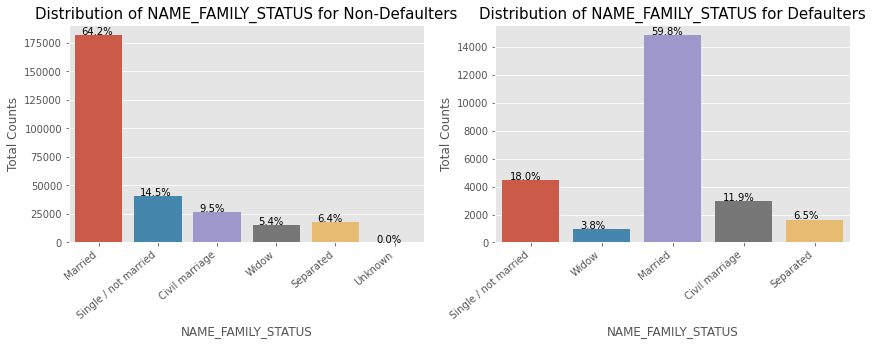

In [62]:
plotunivariateapp('NAME_FAMILY_STATUS')

**Observation**:
- We can observe Married people tend to apply for more loans comparatively.
- But from the plot we can observe that Single/non Married people contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more risk associated with them.

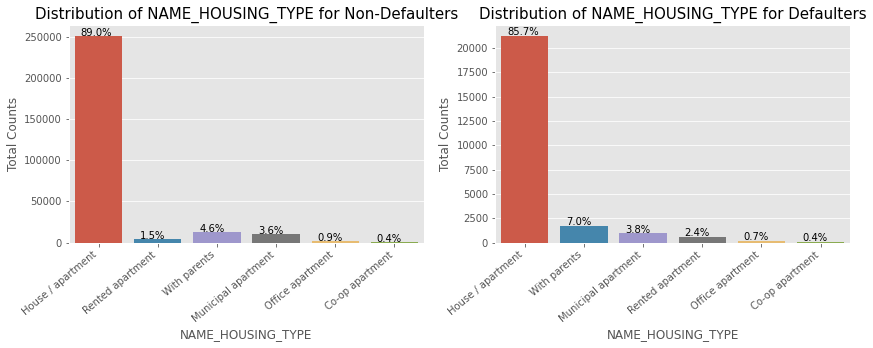

In [63]:
plotunivariateapp('NAME_HOUSING_TYPE')

**Observation:**
 - It is clear from the graph that people who have House/Appartment, tend to apply for more loans.
 - People living with parents tend to default more often when compared with others.The reason could be their living expenses are more due to their parents living with them.

5.4.2 Univariate Categorical Ordered Analysis

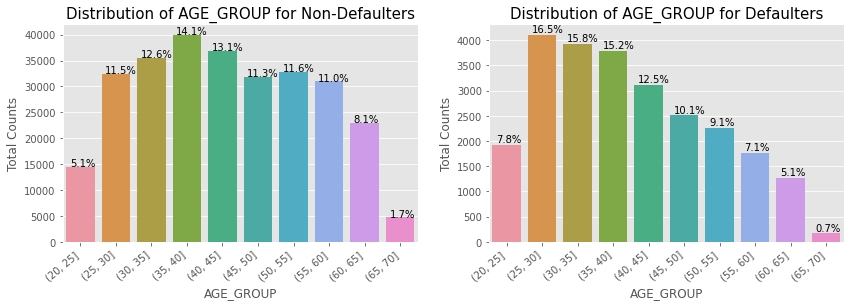

In [64]:
plotunivariateapp('AGE_GROUP')

**Observation**:
- We observe that (20, 35) & (25,30] age group tend to default more often. So they are the riskiest people.
- With increasing age group, people tend to default less starting from the age 25. One of the reasons could be they get employed around that age and with increasing age, their salary also increases.

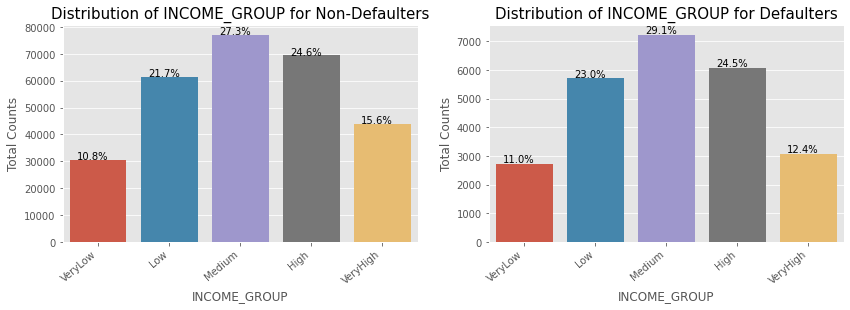

In [65]:
plotunivariateapp('INCOME_GROUP')

**Observation**:
- The Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters.

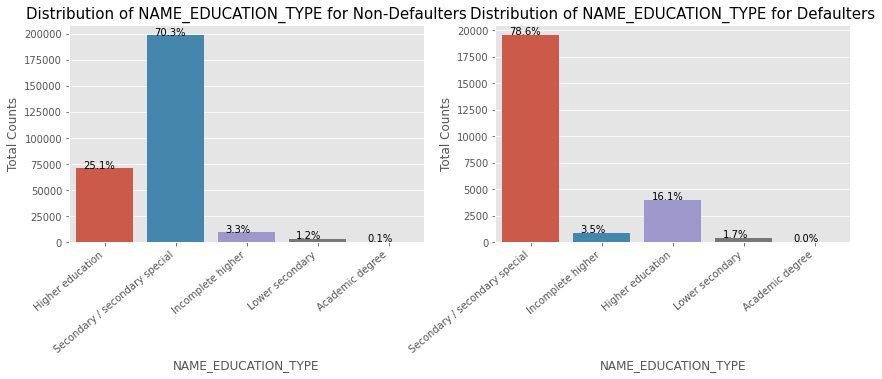

In [66]:
plotunivariateapp('NAME_EDUCATION_TYPE')

**Observation**:
- Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default

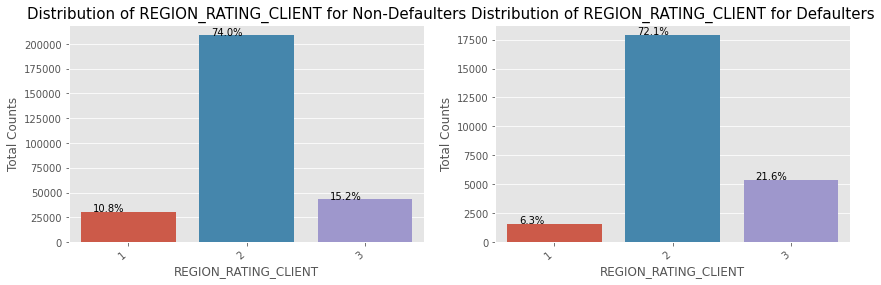

In [67]:
plotunivariateapp('REGION_RATING_CLIENT')

**Obsevation**:
- More people from second tier regions tend to apply for loans.
We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage.



**5.4.3 Univariate continuous variable analysis**

In [68]:
# function to dist plot for continuous variables
def plotuniformdist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
    
    sns.distplot(a=app_0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=12)
            
    sns.distplot(a=app_1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=12)    
        
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


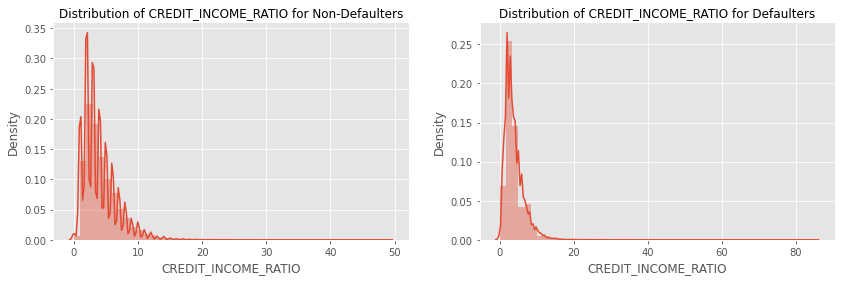

In [69]:
plotuniformdist('CREDIT_INCOME_RATIO')

**Observation**:
- Credit income ratio = AMT_CREDIT/AMT_INCOME_TOTAL.
- Although there doesn't seem to be a clear distiguish between the group which defaulted vs the group which didn't when compared using the ratio, we can observe that when the CREDIT_INCOME_RATIO is more than 50, people default.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


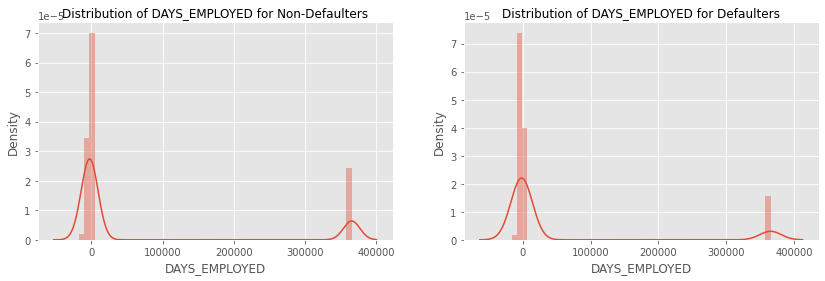

In [70]:
plotuniformdist('DAYS_EMPLOYED')

Observation:
- The distribution for defaulter and non-defaulter is same. So we cannot distinguish between these groups

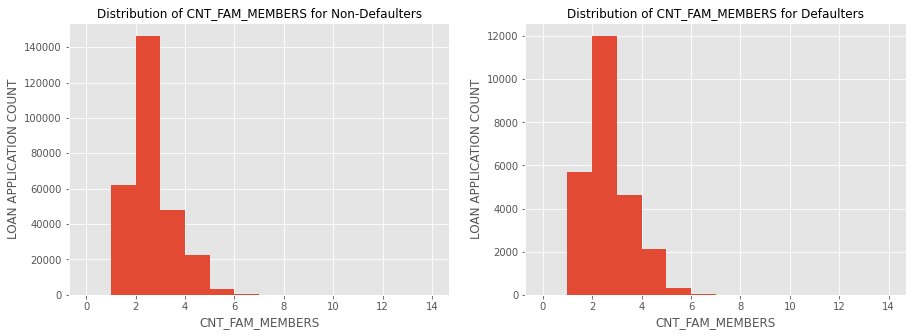

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
app_0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=12)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
app_1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=12)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

**Observation**:
- We can observe that a family of 2 applies loan more often than the other families
- We can observe the rate of default of family of 3 is higher than other families



**5.5 Getting the top 10 correlation of the selected columns**

In [72]:
#Getting the top 10 correlation for non-defaulters
corr=app_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
385,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999758,0.999758
302,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
289,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148,0.950148
313,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
262,AMT_ANNUITY,AMT_CREDIT,0.771308,0.771308
82,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589,0.648589
304,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628749,0.628749
263,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954,0.418954
264,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391499,0.391499
303,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349461,0.349461


**Observation**:
Correlating factors amongst non-defaulters:
 - Credit amount is highly correlated with
> - Amount of Goods Price
> - Loan Annuity
> - Total Income

In [73]:
#Getting the top 10 correlation for defaulters
corr=app_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
385,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999702,0.999702
302,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
289,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
313,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
262,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
82,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
304,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623163,0.623163
264,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
334,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.250519,0.250519
329,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,-0.248859,0.248859


**Observation**: Correlating factors amongst defaulters:

We can observe the correlation almost similar compared to non-defaulters

- Credit amount is highly correlated with
> - Amount of Goods Price
> - Loan Annuity
> - Total Income

**5.6 Bivariate Analysis of numerical variables**

In [74]:
# function for scatter plot for continuous variables
def plotbivariate(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
    
    sns.scatterplot(x=var1, y=var2,data=app_0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=12)
    
    sns.scatterplot(x=var1, y=var2,data=app_1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=12)
            
    plt.show()

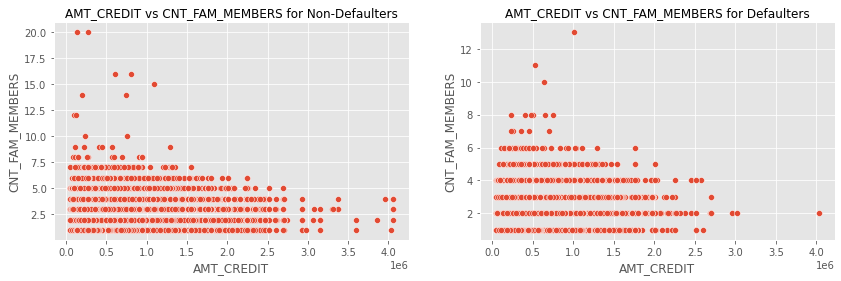

In [75]:
plotbivariate('AMT_CREDIT','CNT_FAM_MEMBERS')

**Observation**:
- We can observe that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often

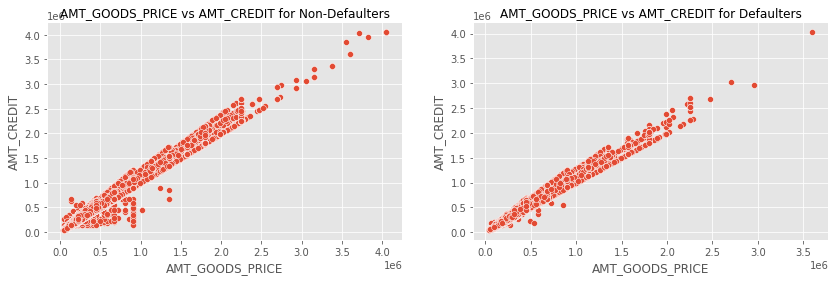

In [76]:
plotbivariate('AMT_GOODS_PRICE','AMT_CREDIT')

Observation:
- We can observe that Amount goods price and Amount credit are correlated to each other

# **6. Data Analysis on Previous Application Data**

**6.1 Doing some more routine check**

In [77]:
pre_data.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [78]:
# Removing all the columns with more than 50% of null values
pre_data = pre_data.loc[:,pre_data.isnull().mean()<=0.5]
pre_data.shape

(1670214, 33)

**6.2 Univariate analysis**

In [79]:
# function to count plot for categorical variables
def plot_univariate(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(14,4))

    # Adding the normalized percentage for easier comparision
    # for p in ax.patches:
        # ax.annotate('{:.1f}%'.format((p.get_height()/len())*100), (p.get_x()+0.1, p.get_height()+50))


    sns.countplot(x=var, data=pre_data,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

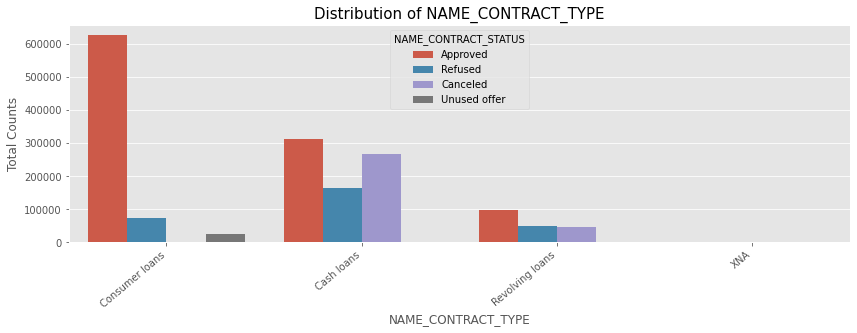

In [80]:
plot_univariate('NAME_CONTRACT_TYPE')

**Observation**:
- From the above chart, we can infer that, most of the applications are for 'Consumer loan' and 'Cash loan'. 
- The cash loans are cancelled more often than other loans.
- The Cash loans and Revolving loans are refused more often than Consumer loans

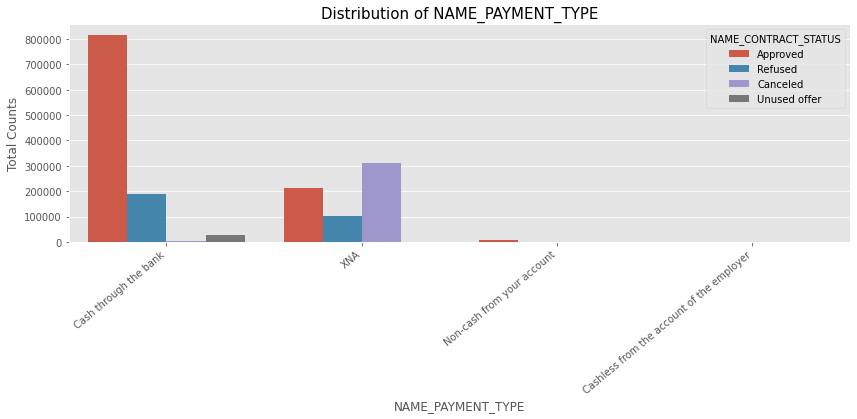

In [81]:
plot_univariate('NAME_PAYMENT_TYPE')

**Observation**:
- From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option
We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

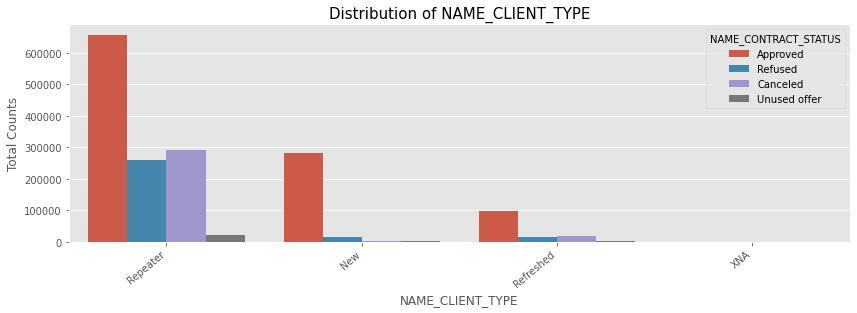

In [82]:
plot_univariate('NAME_CLIENT_TYPE')

**Observation**:
- Most of the loan applications are from repeat customers, out of the total applications 75% of customers are repeaters. They also get refused most often.

**6.3 Checking the correlation in the PreviousApplication dataset**

In [83]:
#Getting the top 10 correlation PreviousApplication
corr=pre_data.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


**Observation**:
-	We can observe ‘Credit amount’ is correlated with following features
> -	Payment count
> -	Amount Goods price
-	We can observe ‘Amount annuity’ is correlated with following features
> -	Credit amount
> -	Amount Goods price
> -	Application amount
-	We can observe ‘Amount application’ is correlated with following features
> -	Credit amount
> -	Payment count
> -	Amount Goods price


**6.4 Using pairplot to perform bivariate analysis on numerical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

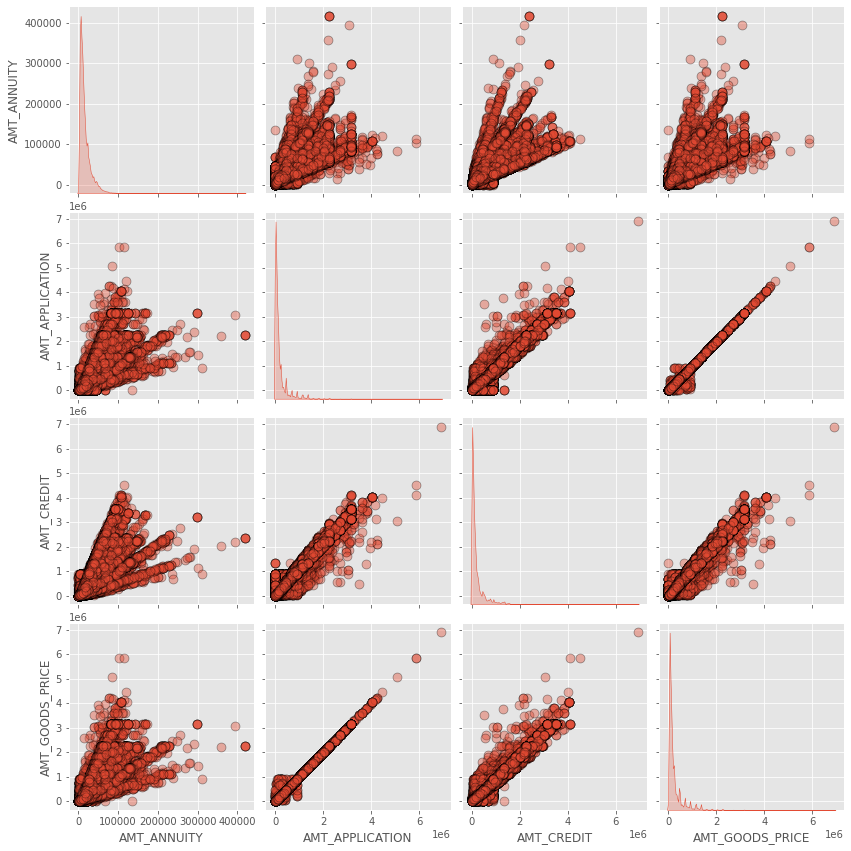

In [84]:
#plotting the relation between correlated highly corelated numeric variables
plt.figure(figsize=[10,10])
sns.pairplot(pre_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 3)
plt.show()

**Observation**:
- Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors)


> 1.   The amount of  credit did client asked on the previous application
> 2.   Final credit amount on the previous application that was approved by the bank
> 3.Goods price of good that client asked for on the previous application.

- For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

- Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

**6.5 Using box plot to do some more bivariate analysis on categorical vs numeric columns**

In [85]:

#bivariant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=pre_data)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

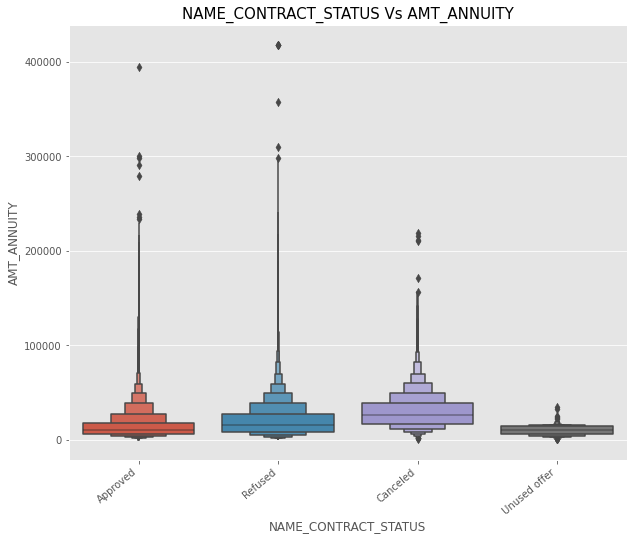

In [86]:
#bivarient analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

**Observation**:
- From the above plot we can see that loan application for people with lower AMT_ANNUITY gets cancelled or Unused most of the time.
- We can also see that applications with too high AMT ANNUITY also got refused more often than others.

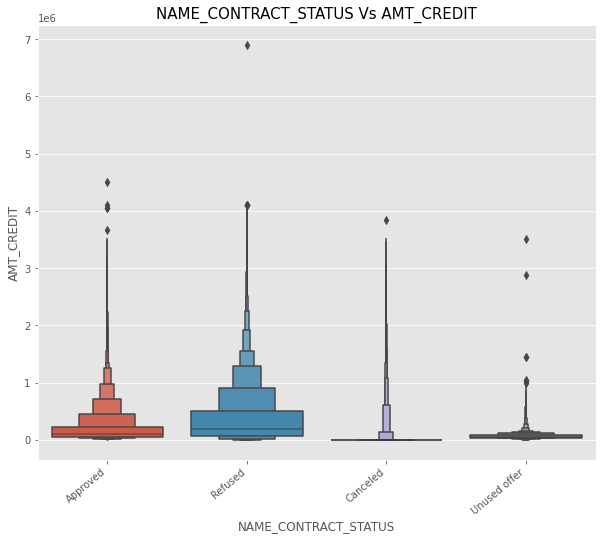

In [87]:
#bi-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

**Observation**:
- We can infer that when the AMT_CREDIT is too low, it ges cancelled/unused most of the time.

# **7. Merging the files and analyzing the data**

In [88]:
## Merging the two files to do some analysis
app_pre = pd.merge(app_data_final, pre_data, how='left', on=['SK_ID_CURR'])

**7.1 Basic checks on merged file**

In [89]:
app_pre.shape

(1430100, 63)

In [90]:
app_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 63 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430100 non-null  int64   
 1   TARGET                       1430100 non-null  int64   
 2   CODE_GENDER                  1430100 non-null  object  
 3   FLAG_OWN_CAR                 1430100 non-null  object  
 4   FLAG_OWN_REALTY              1430100 non-null  object  
 5   INCOME_GROUP                 1430100 non-null  category
 6   AGE_GROUP                    1430096 non-null  category
 7   AMT_CREDIT_x                 1430100 non-null  float64 
 8   AMT_INCOME_TOTAL             1430100 non-null  float64 
 9   CREDIT_INCOME_RATIO          1430100 non-null  float64 
 10  NAME_INCOME_TYPE             1430100 non-null  object  
 11  NAME_EDUCATION_TYPE          1430100 non-null  object  
 12  NAME_FAMILY_STATUS          

In [91]:
def plotunivar_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = app_pre.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(14,4))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

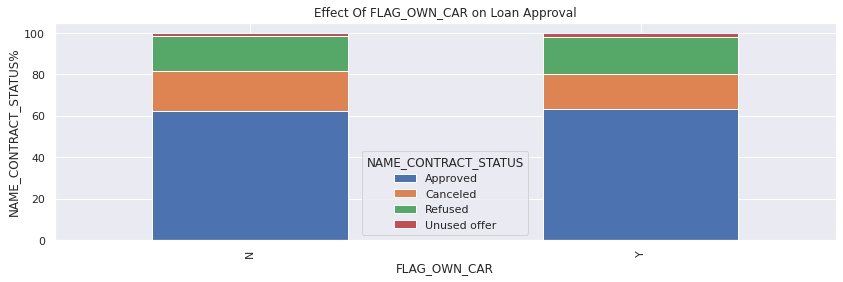

In [92]:
plotunivar_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

**Observation**:
- We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount (refer 4.7.1 Univariate Categorical Ordered Analysis)

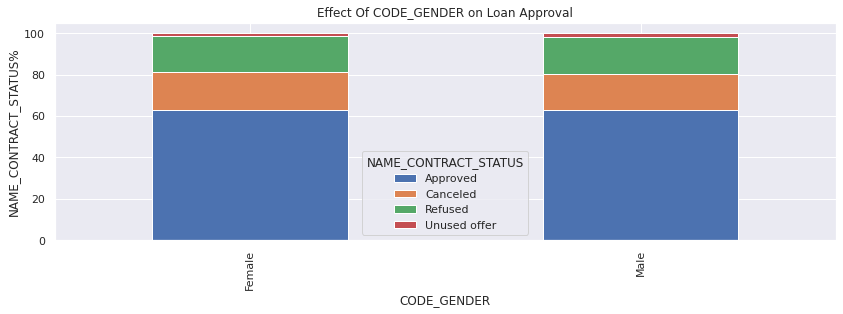

In [93]:
plotunivar_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

**Observation**:
- We see that code gender doesn't have any effect on application approval or rejection.
- But we observed earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

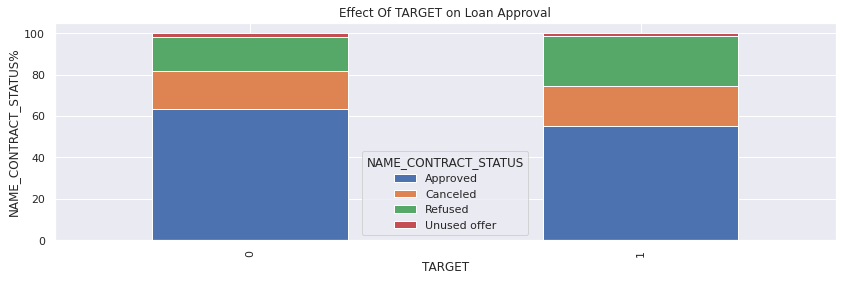

In [94]:
plotunivar_combined('TARGET','NAME_CONTRACT_STATUS')

**Observation**:
Target variable (0 - Non Defaulter 1 - Defaulter )

- We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.

# **8. Summary**



**i.	More weightage on Loan approval**

-	The bank can add more weightage to the following clients while approving the Loan application because they have less chances of being default.
o	Clients who are Female clients (Female clients have lesser chances of default compared to males).
o	Clients who own Car.
o	Clients whose working type is ‘Business men’.
o	Clients who come under ‘Very High-income group’. 
o	Clients who have educational qualification ‘Higher education’.
o	Clients who have larger families and with larger Credit amount. 
o	Clients who were approved for loan earlier.

**ii.	More cautious on Loan approval**

-	The bank can be more cautious to the following clients while approving the Loan application because they have some chances of being default.
o	Clients who are living with parents.
o	Clients whose family status as ‘Single or non-married clients’.
o	Clients between the age group 20 to 30.
o	Clients who have educational qualification ‘Secondary education’.
o	Clients who are living better areas (REGION_RATING_CLIENT is ‘3’).
o	Clients whose Credit income ratio is more than 50.
